In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
df1 = pd.read_csv("./cosine_sims_eng_fre_1900_2000_20.csv")

print(df1)

                     Word Pair      1900      1920      1940      1960  \
0          catégorie, category  0.525830  0.531943  0.466394  0.569396   
1      avancement, advancement  0.506247  0.503224  0.421806  0.507006   
2                  saint, holy  0.422355  0.499246  0.480330  0.408355   
3                 décès, death  0.440268  0.443213  0.449658  0.434278   
4       références, references  0.456879  0.513717  0.570613  0.622641   
...                        ...       ...       ...       ...       ...   
8816  exécutoires, enforceable  0.457868  0.412059  0.272189  0.549987   
8817       déprimés, depressed -0.016287  0.223011  0.511415  0.439599   
8818     stipulées, stipulated  0.516887  0.360643  0.283114  0.502424   
8819  syphilitique, syphilitic  0.659989  0.571164  0.141580  0.039380   
8820       cuillerée, spoonful  0.419538  0.501035 -0.233447  0.244926   

          1980  Difference Start-End  Biggest Difference  \
0     0.433438             -0.092392           -0.1

In [3]:
df1.describe()

,1900,1920,1940,1960,1980,Difference Start-End,Biggest Difference,Biggest Similarity,Smallest Similarity,Temporal Change Word 1,Temporal Change Word 2,Polysemy Word 1,Polysemy Word 2
count,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000
mean,0.517782,0.488626,0.425391,0.544166,0.519508,0.001726,0.010254,0.619430,0.350370,-0.075630,-0.089983,1.813627,2.405850
std,0.184856,0.213649,0.258452,0.147228,0.155444,0.220658,0.357014,0.076838,0.265835,0.132349,0.144551,0.866327,1.228676
min,-0.540522,-0.682544,-0.628695,-0.446185,-0.435239,-1.095228,-1.302871,0.500028,-0.682544,-0.448693,-0.568172,1.000000,1.000000
25%,0.471125,0.438271,0.335670,0.490676,0.463259,-0.094507,-0.161913,0.556809,0.211574,-0.171637,-0.192468,1.000000,1.000000
50%,0.551693,0.535404,0.504885,0.561630,0.544247,-0.005840,0.051466,0.609980,0.432268,-0.076343,-0.095390,2.000000,2.000000
75%,0.626402,0.618762,0.598867,0.636360,0.618188,0.081666,0.174862,0.674142,0.536623,0.012165,0.009841,2.000000,3.000000
max,0.907961,0.874632,0.888393,0.873227,0.876765,1.216618,1.250920,0.907961,0.837844,0.415741,0.423737,6.000000,6.000000


In [12]:
for i in range(1, df1.shape[0]):
    val = df1['Difference Start-End'][i]
    temp_avg = (abs(df1['Temporal Change Word 1'][i]) + abs(df1['Temporal Change Word 2'][i]))/2

    if(val > 0.44):
        df1['Category'][i] = "Convergence"
    elif(val < -0.44):
        df1['Category'][i] = "Divergence"
    elif(temp_avg > 0.25):
        df1['Category'][i] = "Parallel Change"
    else:
        df1['Category'][i] = "No Semantic Change"

<ipython-input-12-a840393ab940>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'][i] = "No Semantic Change"
<ipython-input-12-a840393ab940>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'][i] = "Convergence"
<ipython-input-12-a840393ab940>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'][i] = "Parallel Change"
<ipython-input-12-a840393ab940>:8: SettingWithCopyWarning: 
A value is trying 

In [13]:
df_con = df1[df1.Category == 'Convergence']

df_con.describe()

,1900,1920,1940,1960,1980,Difference Start-End,Biggest Difference,Biggest Similarity,Smallest Similarity,Temporal Change Word 1,Temporal Change Word 2,Polysemy Word 1,Polysemy Word 2
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.00000,399.000000
mean,-0.066817,0.114869,0.197572,0.498451,0.567224,0.634041,0.715411,0.600773,-0.114638,-0.061503,-0.089402,1.77193,2.095238
std,0.160299,0.267975,0.301616,0.192694,0.095903,0.149306,0.171226,0.069315,0.177426,0.125813,0.133604,0.82402,1.087135
min,-0.540522,-0.682544,-0.592833,-0.446185,0.085605,0.440471,0.442754,0.500527,-0.682544,-0.396744,-0.498497,1.00000,1.000000
25%,-0.162427,-0.051380,-0.024853,0.454214,0.517977,0.521335,0.577401,0.544951,-0.218744,-0.142200,-0.180345,1.00000,1.000000
50%,-0.045781,0.114060,0.188590,0.536237,0.567313,0.594610,0.685632,0.591311,-0.091387,-0.066819,-0.089943,2.00000,2.000000
75%,0.039661,0.313098,0.454103,0.606844,0.620763,0.729918,0.819449,0.646108,0.017049,0.011890,0.004517,2.00000,3.000000
max,0.290750,0.753380,0.739833,0.818129,0.825046,1.216618,1.250920,0.825046,0.290750,0.328751,0.419324,5.00000,5.000000


In [6]:
df_div = df1[df1.Category == 'Divergence']

df_div.describe()

,1900,1920,1940,1960,1980,Difference Start-End,Biggest Difference,Biggest Similarity,Smallest Similarity,Temporal Change Word 1,Temporal Change Word 2,Polysemy Word 1,Polysemy Word 2
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.00
mean,0.665342,0.146715,-0.178416,0.105123,-0.267293,-0.932636,-1.022121,0.668490,-0.353631,0.047577,-0.084441,1.25,1.25
std,0.121878,0.542614,0.220728,0.354354,0.150699,0.120241,0.065352,0.121109,0.094794,0.101299,0.120257,0.50,0.50
min,0.534387,-0.411482,-0.344011,-0.126813,-0.435239,-1.095228,-1.095228,0.534387,-0.435239,-0.018154,-0.239273,1.00,1.00
25%,0.612382,-0.270714,-0.312988,-0.118973,-0.327767,-0.971548,-1.063111,0.621825,-0.417421,-0.013965,-0.149554,1.00,1.00
50%,0.649184,0.173686,-0.255616,-0.038490,-0.282423,-0.914012,-1.023693,0.655480,-0.377746,0.005783,-0.058336,1.00,1.00
75%,0.702145,0.591115,-0.121044,0.185606,-0.221949,-0.875099,-0.982703,0.702145,-0.313956,0.067325,0.006778,1.25,1.25
max,0.828614,0.650970,0.141580,0.624286,-0.069087,-0.807291,-0.945869,0.828614,-0.223791,0.196898,0.018181,2.00,2.00


In [7]:
df_par = df1[df1.Category == 'Parallel Change']

df_par.describe()

,1900,1920,1940,1960,1980,Difference Start-End,Biggest Difference,Biggest Similarity,Smallest Similarity,Temporal Change Word 1,Temporal Change Word 2,Polysemy Word 1,Polysemy Word 2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.567398,0.547149,0.493437,0.590165,0.586595,0.019197,0.040701,0.642695,0.437909,-0.250647,-0.281405,1.920573,2.421875
std,0.142386,0.165989,0.234573,0.108007,0.099528,0.135375,0.281134,0.078132,0.232890,0.136382,0.150474,0.857633,1.191732
min,-0.126801,-0.304654,-0.476699,-0.007568,0.063757,-0.455179,-1.079795,0.500404,-0.476699,-0.448693,-0.568172,1.000000,1.000000
25%,0.511663,0.482835,0.449923,0.528382,0.524046,-0.054102,-0.112894,0.581704,0.380363,-0.322623,-0.355553,1.000000,1.000000
50%,0.583423,0.578447,0.561852,0.593431,0.592963,0.003613,0.054657,0.641572,0.505996,-0.271842,-0.305201,2.000000,2.000000
75%,0.658105,0.652278,0.642507,0.664444,0.657884,0.068583,0.156832,0.699870,0.586904,-0.225649,-0.258505,2.000000,3.000000
max,0.883226,0.843068,0.829585,0.856545,0.812537,0.824446,0.941523,0.883226,0.802200,0.415741,0.423737,5.000000,6.000000


In [8]:
df_no = df1[df1.Category == 'No Semantic Change']

df_no.describe()

,1900,1920,1940,1960,1980,Difference Start-End,Biggest Difference,Biggest Similarity,Smallest Similarity,Temporal Change Word 1,Temporal Change Word 2,Polysemy Word 1,Polysemy Word 2
count,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000
mean,0.517397,0.485423,0.420706,0.540244,0.512971,-0.004427,0.002778,0.617068,0.345933,-0.058959,-0.071766,1.803422,2.408018
std,0.177837,0.213655,0.258111,0.148431,0.157456,0.216063,0.356684,0.076317,0.262886,0.119137,0.129987,0.867041,1.232725
min,-0.484114,-0.682544,-0.628695,-0.297457,-0.334368,-0.795698,-1.302871,0.500028,-0.682544,-0.396744,-0.425983,1.000000,1.000000
25%,0.468311,0.435452,0.327020,0.486826,0.455883,-0.099640,-0.169158,0.554932,0.204287,-0.147004,-0.166873,1.000000,1.000000
50%,0.549517,0.532687,0.500861,0.557898,0.539894,-0.008180,0.049391,0.607133,0.427890,-0.064095,-0.080712,2.000000,2.000000
75%,0.623159,0.615076,0.593824,0.632679,0.613324,0.081469,0.174646,0.670691,0.531552,0.020436,0.018104,2.000000,3.000000
max,0.907961,0.874632,0.888393,0.873227,0.876765,0.847669,1.250920,0.907961,0.837844,0.332937,0.396222,6.000000,6.000000


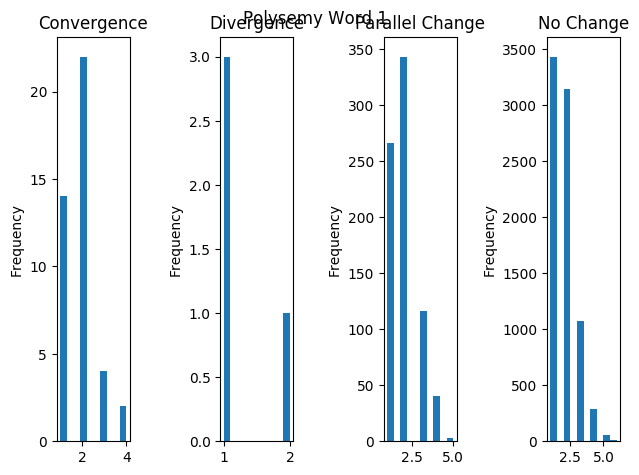

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.suptitle('Polysemy Word 1')

df_con.plot(kind='hist', y='Polysemy Word 1',ax=axes[0], legend=False, title="Convergence")
df_div.plot(kind='hist', y='Polysemy Word 1',ax=axes[1], legend=False, title="Divergence")
df_par.plot(kind='hist', y='Polysemy Word 1',ax=axes[2], legend=False, title="Parallel Change")
df_no.plot(kind='hist', y='Polysemy Word 1',ax=axes[3], legend=False, title = "No Change")

plt.tight_layout()

plt.show()

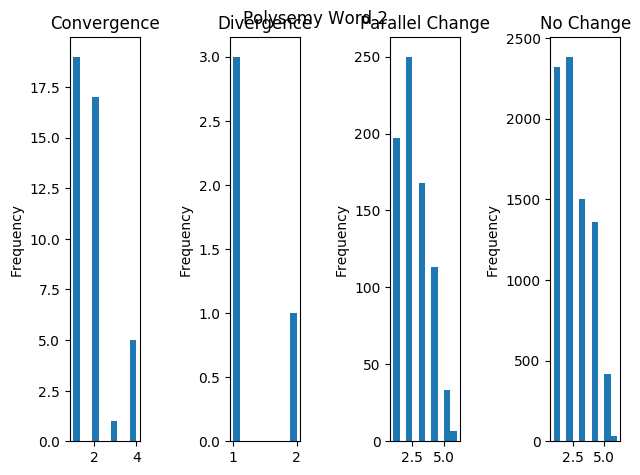

In [10]:
fig2, axes2 = plt.subplots(nrows=1, ncols=4)
fig2.suptitle('Polysemy Word 2')

df_con.plot(kind='hist', y='Polysemy Word 2', ax=axes2[0], legend=False, title="Convergence")
df_div.plot(kind='hist', y='Polysemy Word 2',ax=axes2[1], legend=False, title="Divergence")
df_par.plot(kind='hist', y='Polysemy Word 2',ax=axes2[2], legend=False, title="Parallel Change")
df_no.plot(kind='hist', y='Polysemy Word 2', ax=axes2[3], legend=False, title = "No Change")

plt.tight_layout()

plt.show()

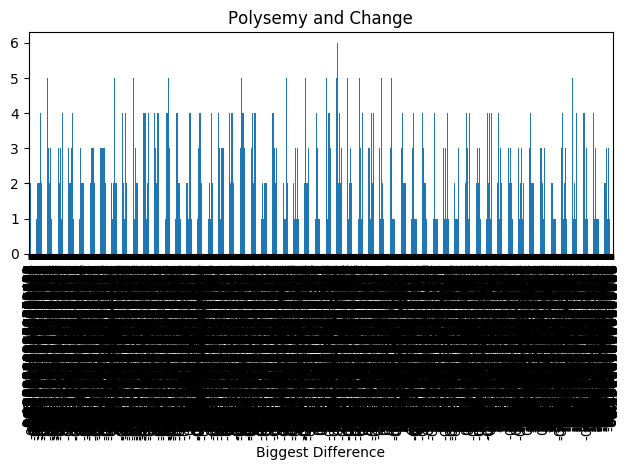

In [11]:
df1.plot(kind='bar',x='Biggest Difference', y='Polysemy Word 2', legend=False, title="Polysemy and Change")


plt.tight_layout()

plt.show()